<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/final_classification_accuracy(75).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv("/content/combine1_data.csv")

In [17]:
pd.set_option('display.max_columns',None)

In [18]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15 23:57:20,341.0,2005-06-24 23:46:20,1.0,7.99,17503.0,2007-02-15 22:25:46.996577,161.0,Harvey,Hope,English


In [19]:
df["rental_date"] = pd.to_datetime(df["rental_date"]).dt.strftime('%Y-%m-%d')
df["rental_date"] = pd.to_datetime(df["rental_date"],format="%Y-%m-%d")
df["return_date"] = pd.to_datetime(df["return_date"]).dt.strftime('%Y-%m-%d')
df["return_date"] = pd.to_datetime(df["return_date"],format="%Y-%m-%d")
# payment_date
df["payment_date"] = pd.to_datetime(df["payment_date"]).dt.strftime('%Y-%m-%d')
df["payment_date"] = pd.to_datetime(df["payment_date"],format="%Y-%m-%d")

In [20]:
df["rental_month"]=df["rental_date"].dt.month
df["rental_year"]=df["rental_date"].dt.year
df["return_month"]=df["return_date"].dt.month
df["renturn_year"]=df["return_date"].dt.year


In [21]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2,rental_month,rental_year,return_month,renturn_year
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15,341.0,2005-06-24,1.0,7.99,17503.0,2007-02-15,161.0,Harvey,Hope,English,6.0,2005.0,6.0,2005.0


In [22]:
df = df.drop(["name", "title", "description", "release_year", "language_id", "length", "replacement_cost",
              "inventory_id", "rental_id", "rental_date", "return_date", "staff_id", "amount",
              "payment_id", "payment_date", "first_name", "last_name", "name-2"], axis=1)


In [23]:
df.dtypes

,0
category_id,float64
film_id,float64
rental_duration,float64
rental_rate,float64
rating,object
store_id,float64
customer_id,float64
actor_id,float64
rental_month,float64
rental_year,float64


In [24]:
df.head(1)

,category_id,film_id,rental_duration,rental_rate,rating,store_id,customer_id,actor_id,rental_month,rental_year,return_month,renturn_year
0,11.0,749.0,6.0,4.99,R,1.0,341.0,161.0,6.0,2005.0,6.0,2005.0


In [26]:
df.isnull().sum()

,0
category_id,5
film_id,5
rental_duration,5
rental_rate,5
rating,5
store_id,221
customer_id,231
actor_id,45
rental_month,231
rental_year,231


In [27]:
df.dropna(inplace=True)

In [28]:
df.duplicated().sum()

114

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(86881, 12)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in df.columns:
  df[i]=le.fit_transform(df[i])

In [34]:
x=df.drop("category_id",axis=1)
y=df["category_id"]

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler=sc.fit_transform(x)

In [36]:
from keras.utils import to_categorical
y_new=to_categorical(y)

In [37]:
y_new.shape

(86881, 16)

In [38]:
x_scaler

array([[ 0.85539422,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ],
       [ 0.85539422,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ],
       [ 0.85539422,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ],
       ...,
       [ 1.61180018,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ],
       [ 1.61180018,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ],
       [ 1.61180018,  0.78298732,  1.2667402 , ...,  0.        ,
        -1.48206031,  0.        ]])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y_new,test_size=0.25,random_state=0)

In [40]:
x_train.shape

(65160, 11)

In [41]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(45,input_shape=(11,),activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(16,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
result=model.fit(x_train,y_train,epochs=10,validation_split=.25,batch_size=16,verbose=1)

Epoch 1/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0911 - loss: 0.2774 - val_accuracy: 0.1392 - val_loss: 0.2249
Epoch 2/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1585 - loss: 0.2230 - val_accuracy: 0.1945 - val_loss: 0.2166
Epoch 3/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2020 - loss: 0.2151 - val_accuracy: 0.2312 - val_loss: 0.2091
Epoch 4/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2320 - loss: 0.2084 - val_accuracy: 0.2446 - val_loss: 0.2035
Epoch 5/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2552 - loss: 0.2020 - val_accuracy: 0.2767 - val_loss: 0.1980
Epoch 6/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2817 - loss: 0.1969 - val_accuracy: 0.2936 - val_loss: 0.1933
Epoch 7/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3028 - loss: 0.1923 - val_accuracy: 0.3083 - val_loss: 0.1893
Epoch 8/10
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3181 - loss: 0.1888 -

In [43]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.25,batch_size=16,verbose=1)

Epoch 1/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3580 - loss: 0.1811 - val_accuracy: 0.3663 - val_loss: 0.1794
Epoch 2/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3652 - loss: 0.1792 - val_accuracy: 0.3796 - val_loss: 0.1769
Epoch 3/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3743 - loss: 0.1777 - val_accuracy: 0.3807 - val_loss: 0.1759
Epoch 4/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3872 - loss: 0.1751 - val_accuracy: 0.3948 - val_loss: 0.1733
Epoch 5/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3937 - loss: 0.1741 - val_accuracy: 0.4013 - val_loss: 0.1728
Epoch 6/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3999 - loss: 0.1721 - val_accuracy: 0.4009 - val_loss: 0.1711
Epoch 7/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4032 - loss: 0.1707 - val_accuracy: 0.4107 - val_loss: 0.1708
Epoch 8/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4103 - loss: 0

In [44]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.25,batch_size=300,verbose=1)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6339 - loss: 0.1222 - val_accuracy: 0.6398 - val_loss: 0.1201
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6503 - loss: 0.1182 - val_accuracy: 0.6432 - val_loss: 0.1198
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6576 - loss: 0.1176 - val_accuracy: 0.6498 - val_loss: 0.1197
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6577 - loss: 0.1176 - val_accuracy: 0.6494 - val_loss: 0.1195
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6557 - loss: 0.1179 - val_accuracy: 0.6492 - val_loss: 0.1194
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.1180 - val_accuracy: 0.6472 - val_loss: 0.1193
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6605 - loss: 0.1171 - val_accuracy: 0.6492 - val_loss: 0.1194
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6577 - loss: 0.1177 - val_accu

In [45]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.25,batch_size=100,verbose=1)

Epoch 1/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6533 - loss: 0.1179 - val_accuracy: 0.6559 - val_loss: 0.1165
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6592 - loss: 0.1167 - val_accuracy: 0.6538 - val_loss: 0.1173
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6600 - loss: 0.1163 - val_accuracy: 0.6634 - val_loss: 0.1160
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6582 - loss: 0.1165 - val_accuracy: 0.6588 - val_loss: 0.1159
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6629 - loss: 0.1153 - val_accuracy: 0.6517 - val_loss: 0.1166
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6662 - loss: 0.1149 - val_accuracy: 0.6590 - val_loss: 0.1172
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6643 - loss: 0.1153 - val_accuracy: 0.6607 - val_loss: 0.1172
Epoch 8/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6632 - loss: 0.1147 - val_accu

In [46]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.25,batch_size=16,verbose=1)

Epoch 1/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5932 - loss: 0.1377 - val_accuracy: 0.6383 - val_loss: 0.1227
Epoch 2/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6317 - loss: 0.1230 - val_accuracy: 0.6285 - val_loss: 0.1238
Epoch 3/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6281 - loss: 0.1230 - val_accuracy: 0.6262 - val_loss: 0.1242
Epoch 4/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6397 - loss: 0.1216 - val_accuracy: 0.6122 - val_loss: 0.1255
Epoch 5/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6297 - loss: 0.1231 - val_accuracy: 0.6266 - val_loss: 0.1213
Epoch 6/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6260 - loss: 0.1232 - val_accuracy: 0.6136 - val_loss: 0.1253
Epoch 7/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6261 - loss: 0.1226 - val_accuracy: 0.6413 - val_loss: 0.1200
Epoch 8/100
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6290 - loss

**extra**

In [47]:
result=model.fit(x_train,y_train,epochs=3,validation_split=.05,batch_size=100,verbose=1)

Epoch 1/3
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6926 - loss: 0.1067 - val_accuracy: 0.7072 - val_loss: 0.1040
Epoch 2/3
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7015 - loss: 0.1053 - val_accuracy: 0.7014 - val_loss: 0.1046
Epoch 3/3
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6984 - loss: 0.1055 - val_accuracy: 0.7078 - val_loss: 0.1046


In [48]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.05,batch_size=100,verbose=1)

Epoch 1/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6929 - loss: 0.1058 - val_accuracy: 0.6909 - val_loss: 0.1050
Epoch 2/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6968 - loss: 0.1060 - val_accuracy: 0.6964 - val_loss: 0.1065
Epoch 3/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6963 - loss: 0.1058 - val_accuracy: 0.6952 - val_loss: 0.1050
Epoch 4/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6981 - loss: 0.1057 - val_accuracy: 0.6912 - val_loss: 0.1051
Epoch 5/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6911 - loss: 0.1069 - val_accuracy: 0.6888 - val_loss: 0.1055
Epoch 6/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6966 - loss: 0.1055 - val_accuracy: 0.6882 - val_loss: 0.1072
Epoch 7/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6940 - loss: 0.1067 - val_accuracy: 0.6980 - val_loss: 0.1071
Epoch 8/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6950 - loss: 0.1058 - val_accu

In [49]:
result=model.fit(x_train,y_train,epochs=50,validation_split=.05,batch_size=200,verbose=1)

Epoch 1/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7243 - loss: 0.1001 - val_accuracy: 0.7287 - val_loss: 0.0979
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7288 - loss: 0.0979 - val_accuracy: 0.7244 - val_loss: 0.0983
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7296 - loss: 0.0979 - val_accuracy: 0.7250 - val_loss: 0.0984
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7276 - loss: 0.0982 - val_accuracy: 0.7342 - val_loss: 0.0982
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7313 - loss: 0.0979 - val_accuracy: 0.7179 - val_loss: 0.0981
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7307 - loss: 0.0979 - val_accuracy: 0.7284 - val_loss: 0.0988
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7316 - loss: 0.0977 - val_accuracy: 0.7296 - val_loss: 0.0975
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7252 - loss: 0.0988 - val_accuracy: 0.

In [50]:
model.evaluate(x_test,y_test)

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7177 - loss: 0.1011


[0.10047968477010727, 0.7193039059638977]

In [54]:
yp=model.predict(x_test)
yp[:1]

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.0891991e-03, 2.0036801e-05, 9.2306366e-04, 1.4879513e-06,
        7.1584600e-01, 7.6981797e-04, 2.4034510e-18, 1.2563942e-04,
        1.3422203e-01, 6.6230386e-03, 4.2170510e-03, 6.5031322e-06,
        1.7171100e-02, 2.5978233e-03, 1.1369903e-05, 4.0404084e-06]],
      dtype=float32)

In [59]:
import pandas as pd
import numpy as np

# Example of how y_pred is generated (based on previous steps)
y_pred = []

for i in yp:
    temp = np.zeros_like(i)  # Create a zero array
    max_index = np.argmax(i)  # Find the index of the max value
    temp[max_index] = 1  # Set the max value to 1
    y_pred.append(temp)  # Append the modified array

# Convert the list of arrays to a numpy array
y_pred = np.array(y_pred)

# Convert the numpy array to a Pandas DataFrame
df_pred = pd.DataFrame(y_pred)

# Output the DataFrame
df_pred[:5]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y_test[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1535
           1       0.77      0.85      0.81      1641
           2       0.67      0.70      0.68      1390
           3       0.73      0.81      0.77      1233
           4       0.76      0.50      0.60      1230
           5       0.63      0.88      0.73      1508
           6       0.85      0.92      0.88      1512
           7       0.71      0.59      0.64      1350
           8       0.78      0.75      0.76      1379
           9       0.68      0.32      0.44      1080
          10       0.78      0.89      0.83      1223
          11       0.72      0.62      0.67      1076
          12       0.69      0.55      0.61      1303
          13       0.67      0.69      0.68      1387
          14       0.69      0.82      0.75      1716
          15       0.68      0.63      0.65      1158

   micro avg       0.72      0.72      0.72     21721
   macro avg       0.72   

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7193038994521431

In [63]:
result_df=pd.DataFrame(result.history)

In [64]:
import matplotlib.pyplot as plt

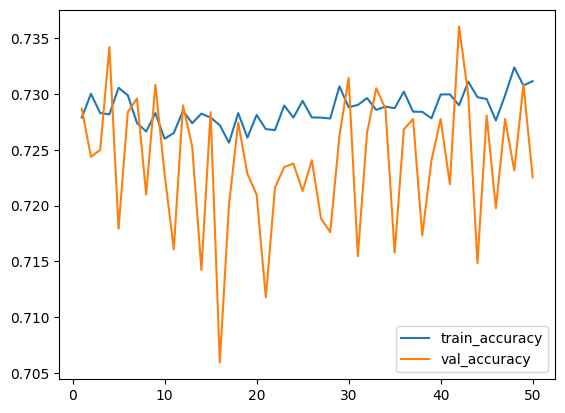

In [65]:
# Get the length of the accuracy data
epochs = len(result_df["accuracy"])

# Plot train and validation accuracy over epochs
plt.plot(range(1, epochs + 1), result_df["accuracy"], label="train_accuracy")
plt.plot(range(1, epochs + 1), result_df["val_accuracy"], label="val_accuracy")

# Add legend and show the plot
plt.legend()
plt.show()
